# Determinant QMC data visualization

## Are you testing or making plots?

In [4]:
SAVEPLOTS = True

## Load simulation data

In [5]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import warnings
cwd = os.getcwd()
import seaborn as sns
sns.set()
sns.set_palette("Blues_r")
sns.set_style("white")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

NSITES = 288
dt = 0.0625
beta = 2.
L = 32
t = 1.
U = 16.
mu = 1.52
totalMCSweeps = 64
freq = 4
intsize = 8
geom = 15
ny = 8

mainDir = ('../data/' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

simDir = (mainDir + '/data-to-reproduce/' + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

plotDir = (mainDir + '/plots/' + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

# Load weights to plot

weights = np.loadtxt(simDir + '/Log-weights.csv')

WL = weights.size

latSweeps = np.arange(WL) + 1

# Metropolis Sampling convergence

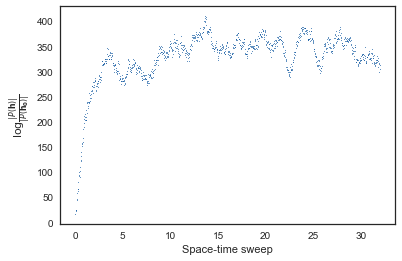

In [6]:
plt.scatter(latSweeps / L, weights, s = 0.3) #show time in space-time sweeps
plt.xlabel(r"Space-time sweep")
plt.ylabel(r'$\log \frac{| P(\mathbf{h}) | }{ | P(\mathbf{h_0}) | } $')
if SAVEPLOTS == True:
    plt.savefig(plotDir + '/Log-weights.png', dpi = 600)

## Spins on the lattice

In [95]:
occ = 2 - np.diag(np.loadtxt(simDir + '/GreenDown.csv')) - np.diag(np.loadtxt(simDir + '/GreenUp.csv'))
occ

array([ 0.91952872,  0.55829156,  0.56967993,  0.91621915,  0.5558397 ,
        0.56441439,  0.91918942,  0.55634481,  0.56516565,  0.9213541 ,
        0.54750072,  0.56617145,  0.91785491,  0.56195707,  0.56535394,
        0.92317548,  0.56530276,  0.56713414,  0.90958512,  0.55596519,
        0.5669847 ,  0.91007308,  0.54573424,  0.56232085,  0.91887201,
        0.56117436,  0.57021806,  0.90346079,  0.5673715 ,  0.56910893,
        0.90187751,  0.56618244,  0.56666663,  0.90352368,  0.56371791,
        0.56719474,  0.90654985,  0.56380925,  0.5659916 ,  0.89959389,
        0.56217975,  0.5686942 ,  0.90311027,  0.56443523,  0.567344  ,
        0.90226043,  0.56528845,  0.56318339,  0.90018353,  0.56314473,
        0.56591856,  0.90306178,  0.55882134,  0.56587796,  0.90364639,
        0.55683293,  0.55063991,  0.904271  ,  0.55294628,  0.55391426,
        0.9031152 ,  0.55432625,  0.5522948 ,  0.90235922,  0.55509721,
        0.55405946,  0.89899224,  0.55371467,  0.55384829,  0.90

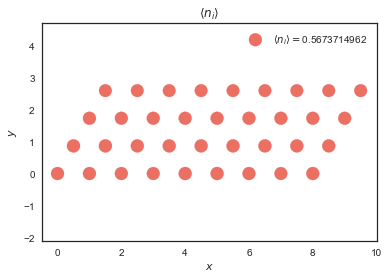

In [99]:
nx = int(NSITES / 3 / ny)

plt.figure(1, figsize = (8,8))
a1 = np.arange(nx)
a2 = np.arange(ny)
vs = np.zeros((nx * ny , 2))
lat = np.zeros((nx * ny))
clr = np.chararray((nx * ny), itemsize = 10)
v1 = np.array([1, 0])
v2 = np.array([1 / 2, np.sqrt(3) / 2])
for i in range(nx):
    for j in range(ny):
            
            vs[nx * j + i, :] =\
            a1[i] * v1 + a2[j] * v2 
            
            lat[nx*j + i] = occ[3*(nx*j + i) + 1]
            
            if (lat[nx*j + i]) > 0:
                clr[nx * j + i] = "#e74c3c"
            else :
                clr[nx * j + i] = "#95a5a6"

dotscale = 300

fig, ax = plt.subplots()

ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(lat),\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None,\
          label = r'$\left\langle n_i\right\rangle=$'+
          str(max(lat)))
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$\left\langle n_i\right\rangle$')
plt.legend()

if SAVEPLOTS == True:
    plt.savefig(plotDir + '/occ.png', dpi = 600)

# $S_z$ Spin-spin correlations $\left\langle S_{i}^\alpha S_{j}^\beta \right\rangle$

In [11]:
SiaSjb = np.loadtxt(simDir + '/EqTimeSzCorrelations.csv')
SiaSjbErr = np.loadtxt(simDir + '/EqTimeSzCorrelationsError.csv')
nOrb = 3

# Two relevant orbital resolved representations:

- Long range - 6 possibilities: $\left\langle S_{i}^{d_{z^2}} S_{j}^{d_{z^2}}\right\rangle$, $\left\langle S_{i}^{d_{xy}} S_{j}^{d_{xy}}\right\rangle$, $\left\langle S_{i}^{d_{x^2 - y^2}} S_{j}^{d_{x^2 - y^2}}\right\rangle$,
$\left\langle S_{i}^{d_{z^2}} S_{j}^{d_{xy}}\right\rangle$, $\left\langle S_{i}^{d_{z^2}} S_{j}^{d_{x^2 - y^2}}\right\rangle$, $\left\langle S_{i}^{d_{xy}} S_{j}^{d_{x^2 - y^2}}\right\rangle$

- On-site: $9 \times 9$ matrix : $\left\langle S_{i}^{\alpha} S_{i}^{\beta}\right\rangle$

###  Long range

In [8]:
nx = int(NSITES / 3 / ny)

SiSjdz2 = np.zeros((nx*ny, nx*ny))
SiSjdxy = np.zeros((nx*ny, nx*ny))
SiSjdx2y2 = np.zeros((nx*ny, nx*ny))

SiSjdz2xy = np.zeros((nx*ny, nx*ny))
SiSjdz2x2y2 = np.zeros((nx*ny, nx*ny))
SiSjdxyx2y2 = np.zeros((nx*ny, nx*ny))

SiSjdz2Err = np.zeros((nx*ny, nx*ny))
SiSjdxyErr = np.zeros((nx*ny, nx*ny))
SiSjdx2y2Err = np.zeros((nx*ny, nx*ny))

SiSjdz2xyErr = np.zeros((nx*ny, nx*ny))
SiSjdz2x2y2Err = np.zeros((nx*ny, nx*ny))
SiSjdxyx2y2Err = np.zeros((nx*ny, nx*ny))

for i in range(int(NSITES / nOrb)):
    for j in range(int(NSITES / nOrb)):
        SiSjdz2[i, j] = SiaSjb[3 * i, 3 * j]
        SiSjdxy[i, j] = SiaSjb[3 * i + 1, 3 * j + 1]
        SiSjdx2y2[i, j] = SiaSjb[3 * i + 2, 3 * j + 2]
        
        SiSjdz2xy[i, j] = SiaSjb[3 * i, 3 * j]
        SiSjdz2x2y2[i, j] = SiaSjb[3 * i + 1, 3 * j + 1]
        SiSjdxyx2y2[i, j] = SiaSjb[3 * i + 2, 3 * j + 2]
        
        SiSjdz2Err[i, j] = SiaSjbErr[3 * i, 3 * j]
        SiSjdxyErr[i, j] = SiaSjbErr[3 * i + 1, 3 * j + 1]
        SiSjdx2y2Err[i, j] = SiaSjbErr[3 * i + 2, 3 * j + 2]
        
        SiSjdz2xyErr[i, j] = SiaSjbErr[3 * i, 3 * j]
        SiSjdz2x2y2Err[i, j] = SiaSjbErr[3 * i + 1, 3 * j + 1]
        SiSjdxyx2y2Err[i, j] = SiaSjbErr[3 * i + 2, 3 * j + 2]

## $\left\langle S_{i}^{d_{z^2}} S_{j}^{d_{z^2}}\right\rangle$

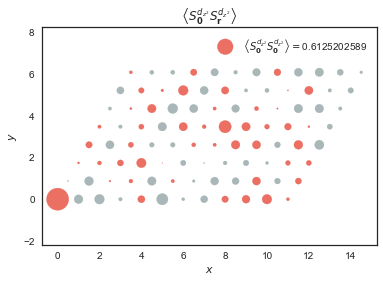

In [9]:
plt.figure(1, figsize = (8,8))
a1 = np.arange(nx)
a2 = np.arange(ny)
vs = np.zeros((nx * ny , 2))
lat = np.zeros((nx * ny))
latErr = np.zeros((nx * ny))
clr = np.chararray((nx * ny), itemsize = 10)
v1 = np.array([1, 0])
v2 = np.array([1 / 2, np.sqrt(3) / 2])
for i in range(nx):
    for j in range(ny):
            
            vs[nx * j + i, :] =\
            a1[i] * v1 + a2[j] * v2 
            
            lat[nx * j + i]\
            =  (SiSjdz2[0, nx*j + i])
            
            latErr[nx * j + i]\
            =  (SiSjdz2Err[0, nx*j + i])
            
            if (SiSjdz2[0, nx*j + i]) > 0:
                clr[nx * j + i] = "#e74c3c"
            else :
                clr[nx * j + i] = "#95a5a6"

dotscale = 800

fig, ax = plt.subplots()

ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(lat),\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None,\
          label = r'$\left\langle S_{\mathbf{0}}^{d_{z^2}} S_{\mathbf{0}}^{d_{z^2}}\right\rangle=$'+
          str(max(lat)))
ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(latErr),\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = 'g', facecolors = None)
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$\left\langle S_{\mathbf{0}}^{d_{z^2}} S_{\mathbf{r}}^{d_{z^2}}\right\rangle$')
plt.legend()

if SAVEPLOTS == True:
    plt.savefig(plotDir + '/S0Srz2z2.png', dpi = 600)

## $\left\langle S_{i}^{d_{xy}} S_{j}^{d_{xy}}\right\rangle$

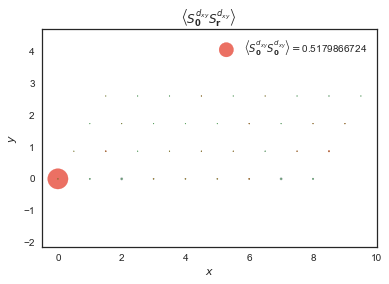

In [103]:
plt.figure(1, figsize = (8,8))
a1 = np.arange(nx)
a2 = np.arange(ny)
vs = np.zeros((nx * ny , 2))
lat = np.zeros((nx * ny))
clr = np.chararray((nx * ny), itemsize = 10)
v1 = np.array([1, 0])
v2 = np.array([1 / 2, np.sqrt(3) / 2])
for i in range(nx):
    for j in range(ny):
            
            vs[nx * j + i, :] =\
            a1[i] * v1 + a2[j] * v2 
            
            lat[nx * j + i]\
            = (SiSjdxy[0, nx*j + i])
            
            latErr[nx * j + i]\
            = (SiSjdxyErr[0, nx*j + i])
            
            if (SiSjdxy[0, nx*j + i]) > 0:
                clr[nx * j + i] = "#e74c3c"
            else :
                clr[nx * j + i] = "#95a5a6"

dotscale = 800

fig, ax = plt.subplots()

ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(lat),\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None,\
          label = r'$\left\langle S_{\mathbf{0}}^{d_{xy}} S_{\mathbf{0}}^{d_{xy}}\right\rangle=$'+
          str(max(lat)))
ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(latErr),\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = 'g', facecolors = None)
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$\left\langle S_{\mathbf{0}}^{d_{xy}} S_{\mathbf{r}}^{d_{xy}}\right\rangle$')
plt.legend()
if SAVEPLOTS == True:
    plt.savefig(plotDir + '/S0Srxyxy.png', dpi = 600)

## $\left\langle S_{i}^{d_{x^2 - y^2}} S_{j}^{d_{x^2 - y^2}}\right\rangle$

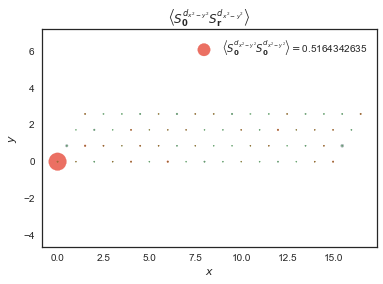

In [81]:
plt.figure(1, figsize = (8,8))
a1 = np.arange(nx)
a2 = np.arange(ny)
vs = np.zeros((nx * ny , 2))
lat = np.zeros((nx * ny))
clr = np.chararray((nx * ny), itemsize = 10)
v1 = np.array([1, 0])
v2 = np.array([1 / 2, np.sqrt(3) / 2])
for i in range(nx):
    for j in range(ny):
            
            vs[nx * j + i, :] =\
            a1[i] * v1 + a2[j] * v2 
            
            lat[nx * j + i]\
            = (SiSjdx2y2[0, nx*j + i])
            
            latErr[nx * j + i]\
            = (SiSjdx2y2Err[0, nx*j + i])
            
            if (SiSjdx2y2[0, nx*j + i]) > 0:
                clr[nx * j + i] = "#e74c3c"
            else :
                clr[nx * j + i] = "#95a5a6"

dotscale = 600

fig, ax = plt.subplots()

ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(lat),\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None,\
          label = r'$\left\langle S_{\mathbf{0}}^{d_{x^2-y^2}} S_{\mathbf{0}}^{d_{x^2-y^2}}\right\rangle=$'+
          str(max(lat)))
ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(latErr),\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = 'g', facecolors = None)
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$\left\langle S_{\mathbf{0}}^{d_{x^2-y^2}} S_{\mathbf{r}}^{d_{x^2-y^2}}\right\rangle$')
plt.legend()

if SAVEPLOTS == True:
    plt.savefig(plotDir + '/S0Srx2y2.png', dpi = 600)

## $\left\langle S_{i}^{d_{z^2}} S_{j}^{d_{xy}}\right\rangle$

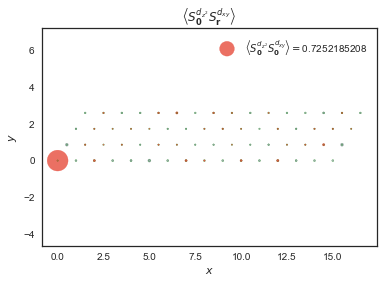

In [82]:
plt.figure(1, figsize = (8,8))
a1 = np.arange(nx)
a2 = np.arange(ny)
vs = np.zeros((nx * ny , 2))
lat = np.zeros((nx * ny))
clr = np.chararray((nx * ny), itemsize = 10)
v1 = np.array([1, 0])
v2 = np.array([1 / 2, np.sqrt(3) / 2])
for i in range(nx):
    for j in range(ny):
            
            vs[nx * j + i, :] =\
            a1[i] * v1 + a2[j] * v2 
            
            lat[nx * j + i]\
            = (SiSjdz2xy[0, nx*j + i])
            latErr[nx * j + i]\
            = (SiSjdz2xyErr[0, nx*j + i])
            
            if (SiSjdz2xy[0, nx*j + i]) > 0:
                clr[nx * j + i] = "#e74c3c"
            else :
                clr[nx * j + i] = "#95a5a6"

dotscale = 600

fig, ax = plt.subplots()

ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(lat),\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None,\
          label = r'$\left\langle S_{\mathbf{0}}^{d_{z^2}} S_{\mathbf{0}}^{d_{xy}}\right\rangle=$'+
          str(max(lat)))
ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(latErr),\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = 'g', facecolors = None)
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$\left\langle S_{\mathbf{0}}^{d_{z^2}} S_{\mathbf{r}}^{d_{xy}}\right\rangle$')
plt.legend()
if SAVEPLOTS == True:
    plt.savefig(plotDir + '/S0Srz2xy.png', dpi = 600)

## $\left\langle S_{i}^{d_{z^2}} S_{j}^{d_{x^2 - y^2}}\right\rangle$

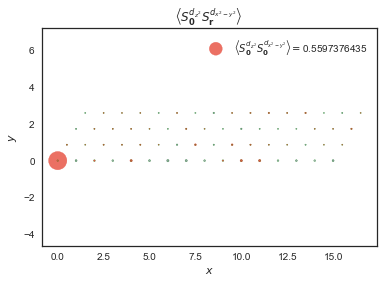

In [83]:
plt.figure(1, figsize = (8,8))
a1 = np.arange(nx)
a2 = np.arange(ny)
vs = np.zeros((nx * ny , 2))
lat = np.zeros((nx * ny))
clr = np.chararray((nx * ny), itemsize = 10)
v1 = np.array([1, 0])
v2 = np.array([1 / 2, np.sqrt(3) / 2])
for i in range(nx):
    for j in range(ny):
            
            vs[nx * j + i, :] =\
            a1[i] * v1 + a2[j] * v2 
            
            lat[nx * j + i]\
            = (SiSjdz2x2y2[0, nx*j + i])
            
            latErr[nx * j + i]\
            = (SiSjdz2x2y2Err[0, nx*j + i])
            
            if (SiSjdz2x2y2[0, nx*j + i]) > 0:
                clr[nx * j + i] = "#e74c3c"
            else :
                clr[nx * j + i] = "#95a5a6"

dotscale = 600

fig, ax = plt.subplots()

ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(lat),\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None,\
          label = r'$\left\langle S_{\mathbf{0}}^{d_{z^2}} S_{\mathbf{0}}^{d_{x^2-y^2}}\right\rangle=$'+
          str(max(lat)))
ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(latErr),\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = 'g', facecolors = None)
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$\left\langle S_{\mathbf{0}}^{d_{z^2}} S_{\mathbf{r}}^{d_{x^2-y^2}}\right\rangle$')
plt.legend()
if SAVEPLOTS == True:
    plt.savefig(plotDir + '/S0Srz2x2y2.png', dpi = 600)

## $\left\langle S_{i}^{d_{xy}} S_{j}^{d_{x^2 - y^2}}\right\rangle$

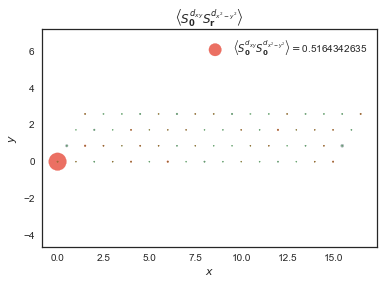

In [84]:
plt.figure(1, figsize = (8,8))
a1 = np.arange(nx)
a2 = np.arange(ny)
vs = np.zeros((nx * ny , 2))
lat = np.zeros((nx * ny))
clr = np.chararray((nx * ny), itemsize = 10)
v1 = np.array([1, 0])
v2 = np.array([1 / 2, np.sqrt(3) / 2])
for i in range(nx):
    for j in range(ny):
            
            vs[nx * j + i, :] =\
            a1[i] * v1 + a2[j] * v2 
            
            lat[nx * j + i]\
            = (SiSjdxyx2y2[0, nx*j + i])
            
            latErr[nx * j + i]\
            = (SiSjdxyx2y2Err[0, nx*j + i])
            
            if (SiSjdxyx2y2[0, nx*j + i]) > 0:
                clr[nx * j + i] = "#e74c3c"
            else :
                clr[nx * j + i] = "#95a5a6"

dotscale = 600

fig, ax = plt.subplots()

ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(lat),\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None,\
          label = r'$\left\langle S_{\mathbf{0}}^{d_{xy}} S_{\mathbf{0}}^{d_{x^2-y^2}}\right\rangle=$'+
          str(max(lat)))
ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(latErr),\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = 'g', facecolors = None)
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$\left\langle S_{\mathbf{0}}^{d_{xy}} S_{\mathbf{r}}^{d_{x^2-y^2}}\right\rangle$')
plt.legend()
if SAVEPLOTS == True:
    plt.savefig(plotDir + '/S0Srxyx2y2.png', dpi = 600)

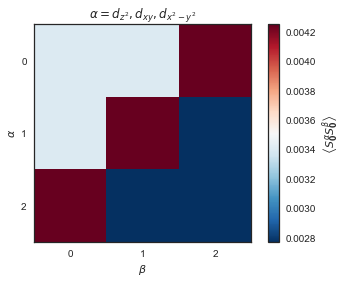

In [55]:
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()

onSiteCorr = np.array([[SiSjdz2[0, 0] ,SiSjdz2xy[0, 0] , SiSjdz2x2y2[0, 0]],\
                       [SiSjdz2xy[0, 0] ,SiSjdxy[0, 0] , SiSjdxyx2y2[0, 0]],\
                       [SiSjdz2x2y2[0, 0] , SiSjdxyx2y2[0, 0], SiSjdx2y2[0, 0]]])

plt.imshow(onSiteCorr, cmap = "RdBu_r")
plt.colorbar(label = r'$\left\langle S_{\mathbf{0}}^\alpha S_\mathbf{0}^\beta \right\rangle$')
plt.ylabel(r'$\alpha$')
plt.xlabel(r'$\beta$')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.title(r'$\alpha = d_{z^2}, d_{xy}, d_{x^2 - y^2}$')
if SAVEPLOTS == True:
    plt.savefig(plotDir + "/onSiteCorrelations00.png", dpi = 600)

## Squared magnetization as a funtion of the transverse coordinate $\left\langle m^2 \right\rangle (y)$

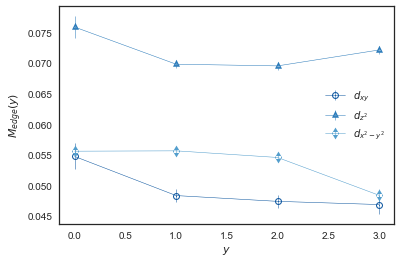

In [126]:
mSq = np.diag(SiaSjb)
nOrb = 3
nx = int(NSITES / nOrb / ny)

mSqdz2 = np.zeros(ny)
mSqdxy = np.zeros(ny)
mSqdx2y2 = np.zeros(ny)

mSqdz2Err = np.zeros(ny)
mSqdxyErr = np.zeros(ny)
mSqdx2y2Err = np.zeros(ny)

for y in range(ny):
    for x1 in range(nx):
        for x2 in range(nx):
            mSqdz2[y] += SiaSjb[3 * (nx * y + x1), 3 * (nx * y + x2)]
            mSqdxy[y] += SiaSjb[3 * (nx * y + x1) + 1, 3 * (nx * y + x2) + 1]
            mSqdx2y2[y] += SiaSjb[3 * (nx * y + x1) + 2, 3 * (nx * y + x2) + 2]
            mSqdz2Err[y] += SiaSjbErr[3 * (nx * y + x1), 3 * (nx * y + x2)]
            mSqdxyErr[y] += SiaSjbErr[3 * (nx * y + x1) + 1, 3 * (nx * y + x2) + 1]
            mSqdx2y2Err[y] += SiaSjbErr[3 * (nx * y + x1) + 2, 3 * (nx * y + x2) + 2]

plt.errorbar(np.arange(4), mSqdxy/(nx**2), marker = 'o', markeredgewidth = 6,\
         markersize = 1, label = r'$d_{xy}$', linewidth = 0.5,\
        yerr=mSqdz2Err / nx**2 )
plt.errorbar(np.arange(4), mSqdz2/(nx**2), marker = '^', markeredgewidth = 4,\
         markersize = 0.5, label = r'$d_{z^2}$', linewidth = 0.5,\
        yerr=mSqdxyErr / nx**2)
plt.errorbar(np.arange(4), mSqdx2y2/(nx**2), marker = 'd', markeredgewidth = 6,\
         markersize = 0.1, label = r'$d_{x^2-y^2}$', linewidth = 0.5,\
        yerr=mSqdx2y2Err / nx**2)
plt.legend()
plt.xlabel(r'$y$')
plt.ylabel(r'$M_{edge} (y)$')

if SAVEPLOTS == True:
    plt.savefig(plotDir + "mSqOrbitalResolved.png", dpi = 600)

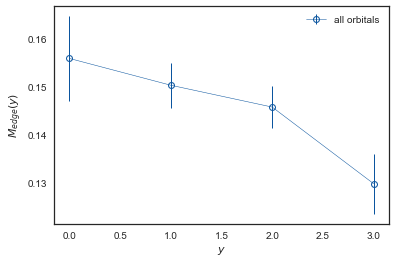

In [128]:
nOrb = 3
nx = int(NSITES / nOrb / ny)

mSq = np.zeros(ny)
mSqError = np.zeros(ny)

for y in range(ny):
    for x1 in range(nx):
        for x2 in range(nx):
            mSq[y] += SiaSjb[3 * (nx * y + x1), 3 * (nx * y + x2)]
            mSq[y] += SiaSjb[3 * (nx * y + x1) + 1, 3 * (nx * y + x2) + 1]
            mSq[y] += SiaSjb[3 * (nx * y + x1) + 2, 3 * (nx * y + x2) + 2]
            mSq[y] += SiaSjb[3 * (nx * y + x1), 3 * (nx * y + x2) + 1]
            mSq[y] += SiaSjb[3 * (nx * y + x1), 3 * (nx * y + x2) + 2]
            mSq[y] += SiaSjb[3 * (nx * y + x1) + 1, 3 * (nx * y + x2) + 2]
            mSqError[y] += SiaSjbErr[3 * (nx * y + x1), 3 * (nx * y + x2)]
            mSqError[y] += SiaSjbErr[3 * (nx * y + x1) + 1, 3 * (nx * y + x2) + 1]
            mSqError[y] += SiaSjbErr[3 * (nx * y + x1) + 2, 3 * (nx * y + x2) + 2]
            mSqError[y] += SiaSjbErr[3 * (nx * y + x1), 3 * (nx * y + x2) + 1]
            mSqError[y] += SiaSjbErr[3 * (nx * y + x1), 3 * (nx * y + x2) + 2]
            mSqError[y] += SiaSjbErr[3 * (nx * y + x1) + 1, 3 * (nx * y + x2) + 2]

plt.errorbar(np.arange(4), mSq / nx**2, marker = 'o',\
             markeredgewidth = 6, markersize = 1,\
             label = r'all orbitals', linewidth = 0.5,\
            elinewidth = 1, yerr = mSqError / nx**2)
plt.legend()
plt.xlabel(r'$y$')
plt.ylabel(r'$M_{edge} (y)$')

if SAVEPLOTS == True:
    plt.savefig(plotDir + "RMSmSq.png", dpi = 600)

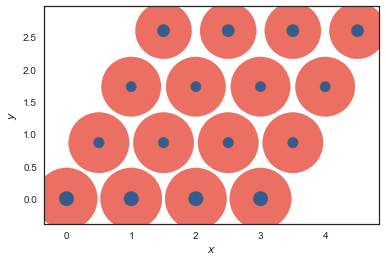

In [138]:
plt.figure(1, figsize = (8,8))

Nx = 4

a1 = np.arange(Nx)
a2 = np.arange(ny)
vs = np.zeros((Nx * ny , 2))
lat = np.zeros((Nx * ny))
clr = np.chararray((Nx * ny), itemsize = 10)
v1 = np.array([1, 0])
v2 = np.array([1 / 2, np.sqrt(3) / 2])
for i in range(Nx):
    for j in range(ny):
            
            vs[Nx * j + i, :] =\
            a1[i] * v1 + a2[j] * v2 
            
            lat[Nx * j + i]\
            = (mSq[j])
            
            latErr[Nx * j + i]\
            = (mSqError[j])
    

dotscale = 300

fig, ax = plt.subplots()

ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(lat),\
           c = "#e74c3c", alpha = 0.8, edgecolors = None)
ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(latErr),\
           c = None, alpha = 0.8, edgecolors = 'g', facecolors = None)
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
if SAVEPLOTS == True:
    plt.savefig(plotDir + '/Medge.png', dpi = 600)

# Orbital-projected correlations

In [12]:
n_qsX = nx
n_qsY = ny
qMax = 2*np.pi
qsX = np.arange(0, qMax + qMax/n_qsX, qMax/n_qsX)
qsY = np.arange(0, qMax + qMax/n_qsY, qMax/n_qsY)
Sdz2 = np.zeros((n_qsX+1, n_qsY+1))
Sdxy = np.zeros((n_qsX+1, n_qsY+1))
Sdx2y2 = np.zeros((n_qsX+1, n_qsY+1))
dist = 0

for idxX, qx in enumerate(qsX):
    for idxY, qy in enumerate(qsY):
        for x1 in range(nx):
            for y1 in range(ny):
                for x2 in range(nx):
                    for y2 in range(ny):
                        Sdz2[idxX, idxY] += np.cos(0.5 * (x1 - x2) * qx +\
                                                   np.sqrt(3)/2*(y1-y2) *qy ) * SiSjdz2[nx * y1 + x1, nx*y2 + x2]
                        Sdxy[idxX, idxY] += np.cos(0.5 * (x1 - x2) * qx +\
                                                   np.sqrt(3)/2*(y1-y2) *qy ) * SiSjdxy[nx * y1 + x1, nx*y2 + x2]
                        Sdx2y2[idxX, idxY] += np.cos(0.5 * (x1 - x2) * qx +\
                                                     np.sqrt(3)/2*(y1-y2) *qy ) * SiSjdx2y2[nx * y1 + x1, nx*y2 + x2]

Sdz2 /=  (NSITES / nOrb)
Sdxy /=  (NSITES / nOrb)
Sdx2y2 /=  (NSITES / nOrb)

KeyboardInterrupt: 

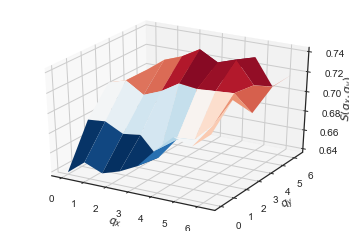

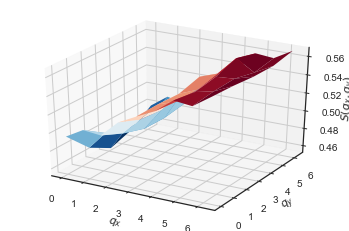

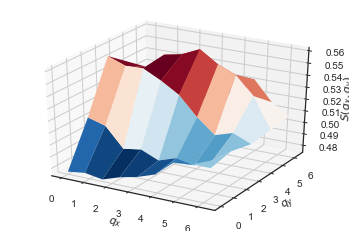

In [146]:
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(qsX, qsY)
ax.plot_surface(X, Y, Sdz2.T,
                cmap=cm.get_cmap('RdBu_r'), edgecolor='none')
ax.set_xlabel(r'$q_x$')
ax.set_ylabel(r'$q_y$')
ax.set_zlabel(r'$S(q_x, q_y)$')
plt.savefig(plotDir + '/S(q)dz2.png', dpi = 600)

fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(qsX, qsY)
ax.plot_surface(X, Y, Sdxy.T,
                cmap=cm.get_cmap('RdBu_r'), edgecolor='none')
ax.set_xlabel(r'$q_x$')
ax.set_ylabel(r'$q_y$')
ax.set_zlabel(r'$S(q_x, q_y)$')
plt.savefig(plotDir + '/S(q)dxy.png', dpi = 600)

fig = plt.figure(3)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(qsX, qsY)
ax.plot_surface(X, Y, Sdx2y2.T,
                cmap=cm.get_cmap('RdBu_r'), edgecolor='none')
ax.set_xlabel(r'$q_x$')
ax.set_ylabel(r'$q_y$')
ax.set_zlabel(r'$S(q_x, q_y)$')
plt.savefig(plotDir + '/S(q)dx2y2.png', dpi = 600)

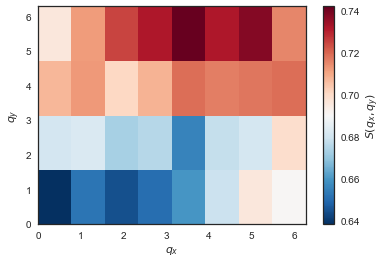

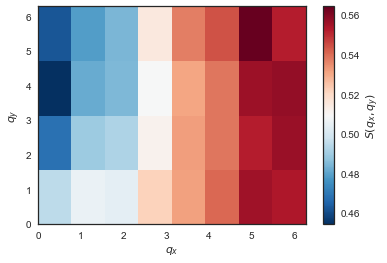

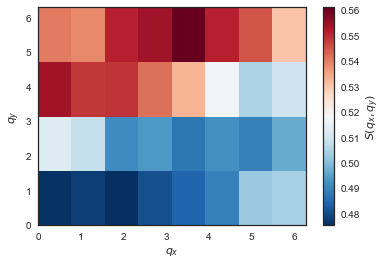

In [147]:
fig1, ax1 = plt.subplots()

p = ax1.pcolor(qsX, qsY, Sdz2.T, cmap=cm.RdBu_r)
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
cb = fig1.colorbar(p)
cb.set_label(r'$S(q_x, q_y)$')
plt.savefig(plotDir + '/S(q)dz2_pcolor.png', dpi = 600)

fig2, ax2 = plt.subplots()

p = ax2.pcolor(qsX, qsY, Sdxy.T, cmap=cm.RdBu_r)
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
cb = fig2.colorbar(p)
cb.set_label(r'$S(q_x, q_y)$')
plt.savefig(plotDir + '/S(q)dxy_pcolor.png', dpi = 600)

fig3, ax3 = plt.subplots()

p = ax3.pcolor(qsX, qsY, Sdx2y2.T, cmap=cm.RdBu_r)
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
cb = fig3.colorbar(p)
cb.set_label(r'$S(q_x, q_y)$')
plt.savefig(plotDir + '/S(q)dx2y2_pcolor.png', dpi = 600)

# Spin-spin correlations (summing over orbitals)

$\left\langle S_i S_j \right\rangle = \sum_{\alpha \beta} \left\langle S_i^\alpha S_j^\beta \right\rangle$

In [13]:
SiSj = np.zeros((nx*ny, nx*ny))

In [14]:
for i in range(nx*ny):
    for j in range(nx*ny):
        SiSj[i, j] = SiaSjb[nOrb * i, nOrb * j] + SiaSjb[nOrb * i + 1, nOrb * j] + SiaSjb[nOrb * i + 2, nOrb * j] + \
        SiaSjb[nOrb * i, nOrb * j + 1] + SiaSjb[nOrb * i + 1, nOrb * j + 1] + SiaSjb[nOrb * i + 2, nOrb * j + 1] + \
        SiaSjb[nOrb * i, nOrb * j + 2] + SiaSjb[nOrb * i + 1, nOrb * j + 2] + SiaSjb[nOrb * i + 2, nOrb * j + 2]

In [15]:
SiSj

array([[ 1.62679535, -0.14155821, -0.0885955 , ..., -0.02109949,
        -0.09143052,  0.04692551],
       [-0.14155821,  1.60178726, -0.36557283, ..., -0.1358171 ,
        -0.07355494,  0.00825255],
       [-0.0885955 , -0.36557283,  1.26599317, ..., -0.01762907,
         0.23853717, -0.18500356],
       ..., 
       [-0.02109949, -0.1358171 , -0.01762907, ...,  1.3148361 ,
        -0.28556434, -0.04713209],
       [-0.09143052, -0.07355494,  0.23853717, ..., -0.28556434,
         1.65231772, -0.24522109],
       [ 0.04692551,  0.00825255, -0.18500356, ..., -0.04713209,
        -0.24522109,  1.39812269]])

In [16]:
flatCorrs = np.zeros((nx, ny))

for x in range(nx):
    for y in range(ny):
        flatCorrs[x, y] = SiSj[0, nx*y + x]

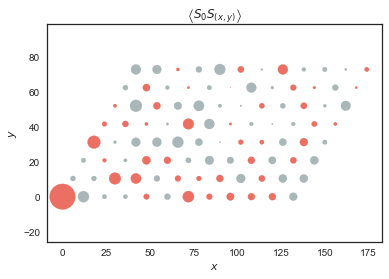

In [17]:
plt.figure(1, figsize = (5,5))
clr = np.chararray((nx * ny), itemsize = 10)
dist = 12

vs = np.zeros((nx * ny , 2))
v1 = dist * np.array([1, 0])
v2 = dist * np.array([1 / 2, np.sqrt(3) / 2])
                
for i in range(nx):
    for j in range(ny):
        vs[nx * j + i, :] =\
                a1[i] * v1 + a2[j] * v2 
        if flatCorrs[i, j] > 0:
            clr[nx * j + i] = "#e74c3c"
        else:
            clr[nx * j + i] = "#95a5a6"

dotscale = 400

fig1, ax1 = plt.subplots()

plt.title(r'$\left\langle S_0 S_{(x, y)} \right\rangle$')
ax1.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(flatCorrs),\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None)
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.savefig(plotDir + '/CorrelationsDots.png', dpi = 600)


In [22]:
qMax = 2*np.pi
qsX = np.arange(0, qMax + qMax/nx, qMax/nx)
qsY = np.arange(0, qMax + qMax/ny, qMax/ny)
S = np.zeros((nx+1, ny+1))
dist = 0

for idxX, qx in enumerate(qsX):
    for idxY, qy in enumerate(qsY):
        for x1 in range(nx):
            for y1 in range(ny):
                for x2 in range(nx):
                    for y2 in range(ny):
                        S[idxX, idxY] += np.cos(0.5 * (x1 - x2) * qx +\
                                                np.sqrt(3) / 2 * (y1-y2) *qy ) * SiSj[nx * y1 + x1, nx*y2 + x2]

S /=  (NSITES / nOrb)

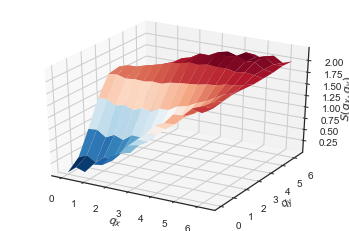

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(qsX, qsY)
ax.plot_surface(X, Y, S.T,
                cmap=cm.get_cmap('RdBu_r'), edgecolor='none')
ax.set_xlabel(r'$q_x$')
ax.set_ylabel(r'$q_y$')
ax.set_zlabel(r'$S(q_x, q_y)$')
plt.savefig(plotDir + '/S(q).png', dpi = 600)

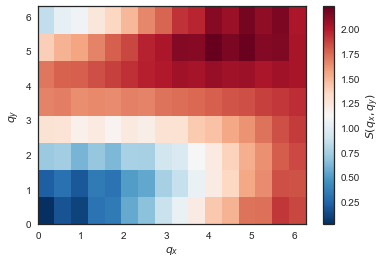

In [24]:
fig, ax = plt.subplots()

p = ax.pcolor(qsX, qsY, S.T, cmap=cm.RdBu_r)
plt.xlabel(r'$q_x$')
plt.ylabel(r'$q_y$')
cb = fig.colorbar(p)
cb.set_label(r'$S(q_x, q_y)$')
plt.savefig(plotDir + '/S(q)pcolor.png', dpi = 600)

In [25]:
maxInds = np.unravel_index(np.argmax(S), (nx+1, ny+1))

print("Maximum of S(q): ")
print('qx', qsX[maxInds[0]])
print('qy', qsY[maxInds[1]])

Maximum of S(q): 
qx 3.92699081699
qy 4.71238898038


## A comparison that could be useful

By the definition of the ZZ magnetic susceptibility

$\chi(\mathbf q) = \frac{1}{N} \sum_{i, j} e^{i \mathbf q \cdot  (\mathbf R_i - \mathbf R_j)} \int_0^\beta \left\langle \mathbf S_{\mathbf i}(\tau) \cdot \mathbf S_{\mathbf j}(0) \right\rangle d\tau $

we obtain an important identity

$\chi ( 0 ) = \beta S ( 0 ) ,$

which we used to check whether our results are consistent.

Unequal-time measurements are more prone to fluctuations and thus there are minor variations due to higher variance of the corresponding estimators.

In [26]:
print("beta S (0): ", S[0, 0] * beta)

beta S (0):  0.103556587537


# Now the same just for one edge

2.4534736620136641

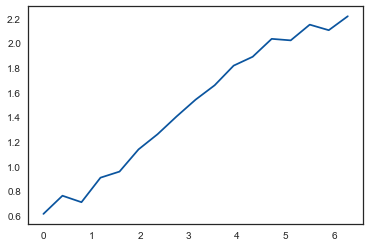

In [27]:
qMax = 2*np.pi
qsX = np.arange(0, qMax + qMax/nx, qMax/nx)
S = np.zeros((nx+1))

for idxX, qx in enumerate(qsX):
    for x1 in range(nx):
        for x2 in range(nx):
            S[idxX] += np.cos(0.5*(x1 - x2) * qx) * SiSj[x1,x2]

S /=nx

plt.plot(qsX, S)
S[0] * beta

2.3919092378705518

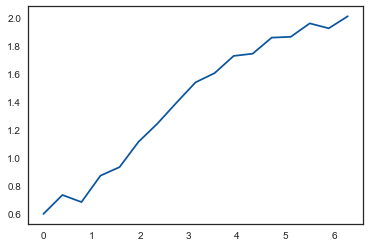

In [28]:
qMax = 2*np.pi
qsX = np.arange(0, qMax + qMax/nx, qMax/nx)
S = np.zeros((nx+1))

for idxX, qx in enumerate(qsX):
    for x1 in range(nx):
        for x2 in range(nx):
            S[idxX] += np.cos(0.5*(x1 - x2) * qx) * SiSj[nx*(ny - 1 ) + x1, nx*(ny - 1 ) + x2]

S /=nx

plt.plot(qsX, S)
S[0] * beta